In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import KFold, train_test_split

In [43]:
df = pd.read_csv("../data/spotify_prediction_updated_data.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.shape

(18554, 25)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18554 entries, 0 to 18553
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Artist_Name             18554 non-null  object 
 1   Track_Name              18554 non-null  object 
 2   Popularity              18554 non-null  int64  
 3   Genres                  18554 non-null  object 
 4   Playlist                18554 non-null  object 
 5   danceability            18554 non-null  float64
 6   energy                  18554 non-null  float64
 7   key                     18554 non-null  int64  
 8   loudness                18554 non-null  float64
 9   mode                    18554 non-null  int64  
 10  speechiness             18554 non-null  float64
 11  acousticness            18554 non-null  float64
 12  instrumentalness        18554 non-null  float64
 13  liveness                18554 non-null  float64
 14  valence                 18554 non-null

In [44]:
df[['Popularity', 'popularity_as_of_nov26']].describe()

,Popularity,popularity_as_of_nov26
count,18554.000000,18554.000000
mean,43.306295,34.188639
std,17.671985,21.746537
min,0.000000,0.000000
25%,32.000000,18.000000
50%,43.000000,35.000000
75%,55.000000,50.000000
max,100.000000,93.000000


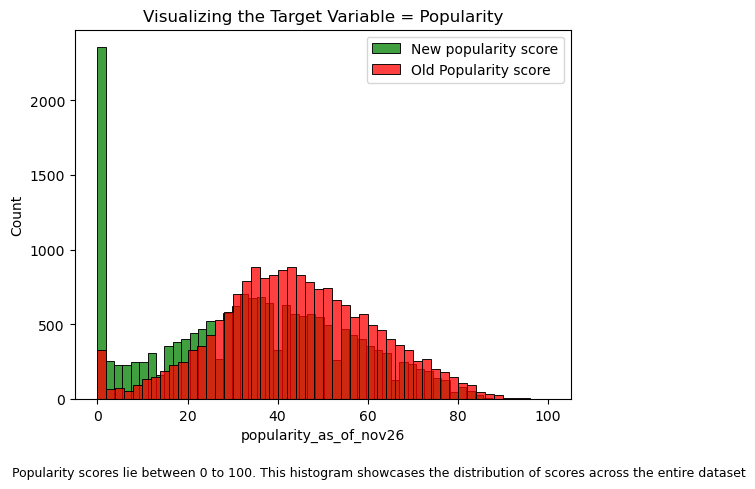

In [45]:
fig, ax = plt.subplots(1,1)
ax = sns.histplot(df['popularity_as_of_nov26'], bins = 50,color="green", label="New popularity score")
ax = sns.histplot(df['Popularity'], bins = 50,color="r", label="Old Popularity score")
plt.title("Visualizing the Target Variable = Popularity")
txt="Popularity scores lie between 0 to 100. This histogram showcases the distribution of scores across the entire dataset"
plt.figtext(0.6, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=9)
plt.legend()
plt.show()

In [66]:
years = []
for date in df['release_date']:
    years.append(date[:4])
    
df['year_of_release'] = years
df['year_of_release'].describe()

count     18554
unique       82
top        2021
freq       4444
Name: year_of_release, dtype: object

In [68]:
df['year_of_release'].unique()

array(['2006', '2017', '2019', '1990', '2021', '2010', '1985', '2005',
       '2013', '2018', '1994', '1976', '1987', '2014', '1968', '2009',
       '2002', '2020', '1977', '1997', '1993', '1939', '2001', '2016',
       '2012', '2003', '1962', '2015', '1969', '1970', '2008', '1971',
       '1958', '1991', '1957', '1992', '1979', '1974', '1996', '2011',
       '1998', '2000', '1967', '1982', '1972', '1989', '1995', '1975',
       '2007', '1937', '1983', '1956', '1964', '1908', '1999', '1986',
       '1973', '1936', '1965', '1959', '1978', '1947', '1955', '1960',
       '1966', '2004', '1935', '1961', '1980', '1963', '1954', '1981',
       '1952', '1928', '1923', '1988', '1945', '1984', '1933', '1900',
       '0000', '2022'], dtype=object)

In [70]:
df[df['year_of_release']=='0000']

,Artist_Name,Track_Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,id,uri,track_href,analysis_url,duration_ms,time_signature,explicit,release_date,popularity_as_of_nov26,year_of_release
8517,Damien,To The Moon,49,['sad rap'],tear drop,0.375,0.0412,0,-21.749,1,...,2RPYgchbWvYjTKPle86H1P,spotify:track:2RPYgchbWvYjTKPle86H1P,https://api.spotify.com/v1/tracks/2RPYgchbWvYj...,https://api.spotify.com/v1/audio-analysis/2RPY...,171000,4,False,0000,0,0000
13248,Koral Banko,The Nomad,54,[],Not Quite Classical,0.544,0.0221,7,-21.880,0,...,2CqYEUz87EmtXLpu5QhjrQ,spotify:track:2CqYEUz87EmtXLpu5QhjrQ,https://api.spotify.com/v1/tracks/2CqYEUz87Emt...,https://api.spotify.com/v1/audio-analysis/2CqY...,177196,3,False,0000,0,0000


In [71]:
df['explicit'].value_counts()

False    15591
True      2963
Name: explicit, dtype: int64

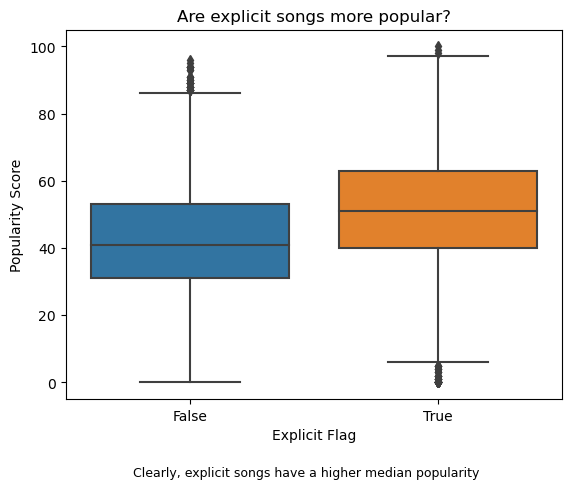

In [90]:
sns.boxplot(x = df['explicit'], y = df['Popularity'])
plt.xlabel("Explicit Flag")
plt.ylabel("Popularity Score")
plt.title("Are explicit songs more popular?")
txt="Clearly, explicit songs have a higher median popularity"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=9)
plt.show()

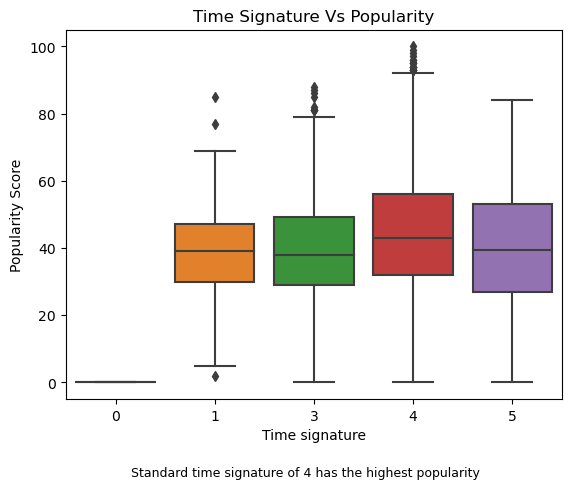

In [92]:
sns.boxplot(x = df['time_signature'], y = df['Popularity'])
plt.xlabel("Time signature")
plt.ylabel("Popularity Score")
plt.title("Time Signature Vs Popularity")
txt="Standard time signature of 4 has the highest popularity"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=9)
plt.show()

In [22]:
years = []
for date in df['release_date']:
    years.append(int(date[:4]))
    
df['year'] = years
df['recency'] = abs(2022-df['year'])

index2 = df[df['release_date'] == '0000'].index
df.drop(index2 , inplace=True)

In [23]:
df['recency'].describe()

count    18552.000000
mean        11.125701
std         14.335501
min          0.000000
25%          2.000000
50%          4.000000
75%         17.000000
max        122.000000
Name: recency, dtype: float64

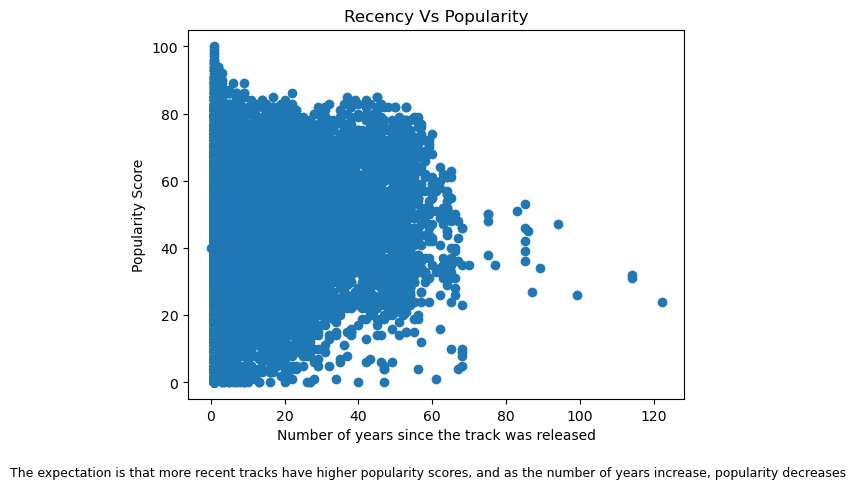

In [27]:
plt.scatter(df['recency'], df['Popularity'])
plt.xlabel("Number of years since the track was released")
plt.ylabel("Popularity Score")
plt.title("Recency Vs Popularity")
txt="The expectation is that more recent tracks have higher popularity scores, and as the number of years increase, popularity decreases"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=9)
plt.savefig('recency_vs_popularity.png', format='png', dpi=300)
plt.show()

In [94]:
df['time_signature'].value_counts()

4    17026
3     1200
5      218
1      109
0        1
Name: time_signature, dtype: int64

In [98]:
len(df[df['year_of_release']=='0000']) 

2

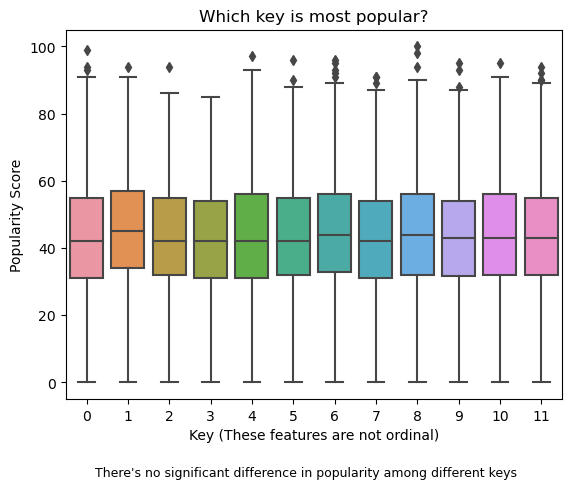

In [102]:
sns.boxplot(x = df['key'], y = df['Popularity'])
plt.xlabel("Key (These features are not ordinal)")
plt.ylabel("Popularity Score")
plt.title("Which key is most popular?")
txt="There's no significant difference in popularity among different keys"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=9)
plt.show()

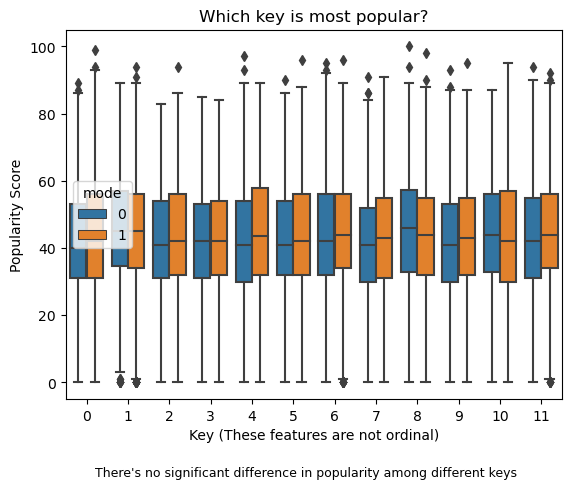

In [101]:
sns.boxplot(x = df['key'], y = df['Popularity'], hue=df['mode'])
plt.xlabel("Key (These features are not ordinal)")
plt.ylabel("Popularity Score")
plt.title("Which key is most popular?")
txt="There's no significant difference in popularity among different keys"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=9)
plt.show()